### Read the transaction data 
read only columns household_key , basket_id, day, product_id, quantity and sales_value 
convert day , quantity and product_id to the smallest appropriate integer types 

In [2]:
import pandas as pd
import numpy as np

In [27]:
path = "../../../project_data/project_transactions.csv"

# specify columns
cols = ["household_key", "BASKET_ID", "DAY", "PRODUCT_ID", "QUANTITY", "SALES_VALUE"]

# specify datatypes to convert 
dtypes = {"DAY": "Int16", "QUANTITY":"Int32", "PRODUCT_ID":"Int32"}

transactions = pd.read_csv(path,
                          dtype=dtypes,
                          usecols=cols)
transactions.head

<bound method NDFrame.head of          household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE
0                 1364  26984896261    1      842930         1         2.19
1                 1364  26984896261    1      897044         1         2.99
2                 1364  26984896261    1      920955         1         3.09
3                 1364  26984896261    1      937406         1         2.50
4                 1364  26984896261    1      981760         1         0.60
...                ...          ...  ...         ...       ...          ...
2146306           1598  42305362535  711       92130         1         0.99
2146307           1598  42305362535  711      114102         1         8.89
2146308           1598  42305362535  711      133449         1         6.99
2146309           1598  42305362535  711     6923644         1         4.50
2146310           1598  42305362535  711    14055192         1         6.99

[2146311 rows x 6 columns]>

In [16]:
transactions.describe().round()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE
count,2146311.0,2.146311e+06,2146311.0,2146311.0,2146311.0,2146311.0
mean,1056.0,3.404897e+10,390.0,2884715.0,101.0,3.0
std,605.0,4.723748e+09,190.0,3831949.0,1152.0,4.0
min,1.0,2.698490e+10,1.0,25671.0,0.0,0.0
25%,548.0,3.040798e+10,229.0,917231.0,1.0,1.0
50%,1042.0,3.281176e+10,392.0,1027960.0,1.0,2.0
75%,1581.0,4.012804e+10,555.0,1132771.0,1.0,3.0
max,2099.0,4.230536e+10,711.0,18316298.0,89638.0,840.0


In [17]:
transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  int64  
 1   BASKET_ID      int64  
 2   DAY            Int16  
 3   PRODUCT_ID     Int32  
 4   QUANTITY       Int32  
 5   SALES_VALUE    float64
dtypes: Int16(1), Int32(2), float64(1), int64(2)
memory usage: 75.7 MB


In [28]:
transactions = (
    transactions
    .assign(date = (pd.to_datetime("2016" , format='%Y')
                    + pd.to_timedelta(transactions['DAY'].sub(1).astype(str) + " days"))
           )
    .drop(["DAY"],axis=1)
)
transactions["date"] = pd.to_datetime(transactions["date"])


In [29]:
transactions.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date
0,1364,26984896261,842930,1,2.19,2016-01-01
1,1364,26984896261,897044,1,2.99,2016-01-01
2,1364,26984896261,920955,1,3.09,2016-01-01
3,1364,26984896261,937406,1,2.50,2016-01-01
4,1364,26984896261,981760,1,0.60,2016-01-01


### Time based analysis 
- plot the sum of sales by month. Are sales growing over time ?
- Next, plot the same series after filtering down to dates April 2016 and October 2017
- Then, plot the sum of sales 2016 vs the 2017 sales.
- Then, plot total sales by day of week

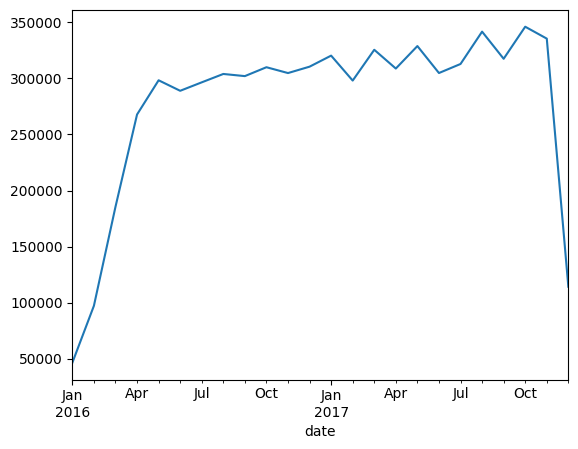

In [32]:
(
    transactions.set_index("date")
    .loc[:, "SALES_VALUE"]
    .resample("ME")
    .sum()
    .plot()
);

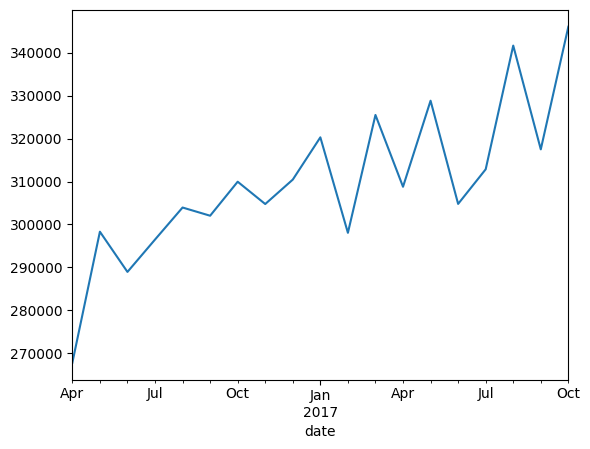

In [35]:
b = transactions.sort_values("date")

(
    transactions
    .set_index("date")
    .loc["2016-04":"2017-10", "SALES_VALUE"]
    .resample("ME")
    .sum()
    .plot()
);

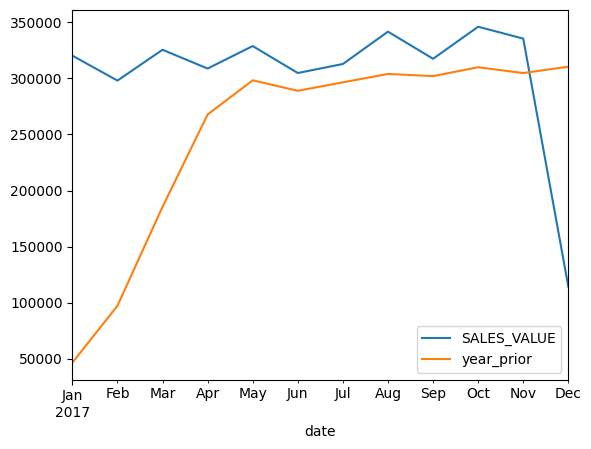

In [39]:
(
    transactions
    .set_index("date")
    .loc[:, ["SALES_VALUE"]]
    .resample("ME")
    .sum()
    .assign(year_prior = lambda x: x["SALES_VALUE"].shift(12))
    .loc["2017"]
    .plot()
);

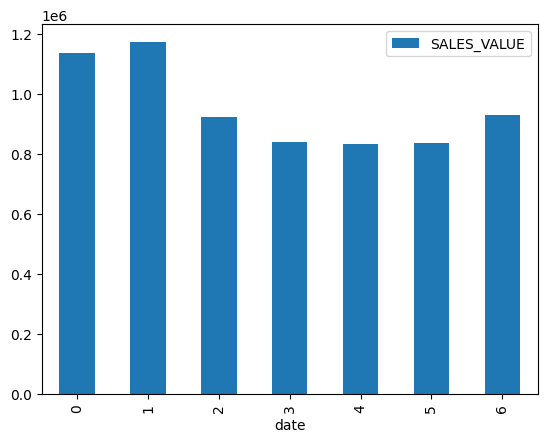

In [40]:
(
    transactions
    .groupby(transactions["date"].dt.dayofweek)
    .agg({"SALES_VALUE":"sum"})
    .plot.bar()
);

### Demographics 
- Read in the hh_demographicb.csv file, but only the columns AGE_DESC, INCOME_DESC, household_key , and HH_COMP_DESC.Convert the appropriate columns to the category type
- Then group the tx table by household_id, and calculate the sum of SALES VALUE by household.
- Once you've done that, join the demographics Dataframe to the transactions table. Since we're interested in analyzing the demographics data we have, make sure not to include rows from tx that don't match
- plot sum of sales by age_desc and income_desc
- Then, create a pivot table of the mean household sales by AGE_DESC and HH_COMP_DESC. Which of our demographics have the highest average sales?

In [60]:
path = "../../../project_data/hh_demographic.csv"

# specify columns
demo_cols = ["household_key", "AGE_DESC", "INCOME_DESC", "HH_COMP_DESC"]

# specify datatypes to convert 
demo_dtypes = {"AGE_DESC": "category", "INCOME_DESC":"category", "HH_COMP_DESC":"category"}

demographics = pd.read_csv(path,
                          dtype=demo_dtypes,
                          usecols=demo_cols)
demographics.head()

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key
0,65+,35-49K,2 Adults No Kids,1
1,45-54,50-74K,2 Adults No Kids,7
2,25-34,25-34K,2 Adults Kids,8
3,25-34,75-99K,2 Adults Kids,13
4,45-54,50-74K,Single Female,16


In [61]:
demographics.describe().round()

,household_key
count,801.0
mean,1235.0
std,737.0
min,1.0
25%,596.0
50%,1218.0
75%,1914.0
max,2499.0


In [62]:
demographics.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   AGE_DESC       801 non-null    category
 1   INCOME_DESC    801 non-null    category
 2   HH_COMP_DESC   801 non-null    category
 3   household_key  801 non-null    int64   
dtypes: category(3), int64(1)
memory usage: 10.9 KB


In [63]:
demographics.dtypes

AGE_DESC         category
INCOME_DESC      category
HH_COMP_DESC     category
household_key       int64
dtype: object

In [64]:
# Then group the tx table by household_key, and calculate the sum of SALES VALUE by household.
transactions.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date
0,1364,26984896261,842930,1,2.19,2016-01-01
3,1364,26984896261,937406,1,2.50,2016-01-01
4,1364,26984896261,981760,1,0.60,2016-01-01
5,1130,26984905972,833715,2,0.34,2016-01-01
6,1130,26984905972,866950,2,0.34,2016-01-01


In [66]:
household_sales = ( transactions
                   .groupby("household_key")
                   .agg({"SALES_VALUE":"sum"})
    
)

household_sales.head()

,SALES_VALUE
household_key,
1,4330.16
2,1954.34
3,2653.21
4,1200.11
5,779.06


In [67]:
# - Once you've done that, join the demographics Dataframe to the transactions table. 
# Since we're interested in analyzing the demographics data we have, 
# make sure not to include rows from tx that don't match
household_sales_demo = (demographics.merge(household_sales,
                   how="inner",
                   left_on = 'household_key',
                   right_on = 'household_key',
                  )
)

In [68]:
household_sales_demo.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   AGE_DESC       668 non-null    category
 1   INCOME_DESC    668 non-null    category
 2   HH_COMP_DESC   668 non-null    category
 3   household_key  668 non-null    int64   
 4   SALES_VALUE    668 non-null    float64 
dtypes: category(3), float64(1), int64(1)
memory usage: 14.7 KB


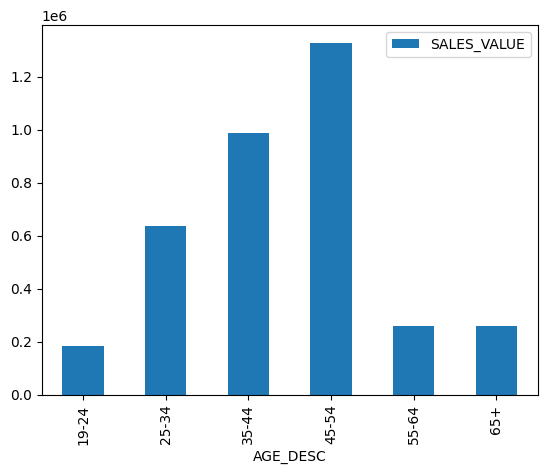

In [71]:
(household_sales_demo
 .groupby(["AGE_DESC"],observed=True)
 .agg({"SALES_VALUE":"sum"})
 .plot.bar()
);

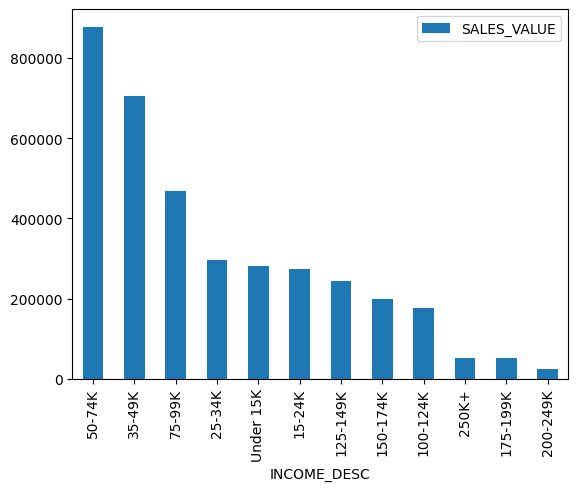

In [72]:
(household_sales_demo
 .groupby(["INCOME_DESC"],observed=True)
 .agg({"SALES_VALUE":"sum"})
 .sort_values("SALES_VALUE", ascending=False)
 .plot.bar()
);

In [80]:
(household_sales_demo.pivot_table(index="AGE_DESC",
                                  columns="HH_COMP_DESC",
                                  values="SALES_VALUE",
                                  aggfunc="mean",
                                  margins=True,
                                 observed=True)
 .style.background_gradient(cmap="RdYlGn", axis=None)
)

HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown,All
AGE_DESC,,,,,,,
19-24,7268.796667,5428.945000,4020.800000,4576.095556,3216.835000,4911.275000,4692.077692
25-34,5512.196875,5753.973514,5638.515833,4807.440588,4909.522381,7356.270000,5435.517521
35-44,6297.737778,6691.772264,6260.412444,6015.192069,4844.192000,4227.691818,6090.556728
45-54,6632.569167,6610.484490,5839.527027,4549.365405,4636.637083,4843.995682,5534.879958
55-64,3064.870000,4695.655000,5752.413684,4816.148462,3922.546250,7973.750000,5168.924200
65+,4040.810000,5536.866667,4614.108571,4059.699412,3871.556000,2879.290000,4340.936500
All,6032.802143,6280.069103,5599.857756,4895.928361,4544.646750,4936.127778,5468.398743


In [81]:
# delete dfs we won't use anymore
del [ household_sales_demo, household_sales]

### Product demographics 
- read in the product csv file
- only read in product_id and department from product ( consider converting column)
- join to tx and demo tables using inner join
- pivot by AGE_DESC and department , calculating sum of sales . Which category does our youngest demo perform well?

In [89]:
path = "../../../project_data/product.csv"

# specify columns
prod_cols = ["PRODUCT_ID", "DEPARTMENT"]

# specify datatypes to convert 
prod_dtypes = {"PRODUCT_ID": "Int32", "DEPARTMENT":"category"}

product = pd.read_csv(path,
                         dtype=prod_dtypes,
                          usecols=prod_cols)
product.head()

,PRODUCT_ID,DEPARTMENT
0,25671,GROCERY
1,26081,MISC. TRANS.
2,26093,PASTRY
3,26190,GROCERY
4,26355,GROCERY


In [90]:
product.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   PRODUCT_ID  92353 non-null  Int32   
 1   DEPARTMENT  92353 non-null  category
dtypes: Int32(1), category(1)
memory usage: 545.2 KB


In [92]:
trans_demo_dept = (transactions
                   .merge(demographics,
                          how="inner",
                          left_on="household_key",
                          right_on="household_key",)
                   .merge(product,
                          how="inner",
                          left_on="PRODUCT_ID",
                          right_on="PRODUCT_ID",)
    
)
trans_demo_dept.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date,AGE_DESC,INCOME_DESC,HH_COMP_DESC,DEPARTMENT
0,1364,26984896261,842930,1,2.19,2016-01-01,65+,100-124K,Single Female,GROCERY
1,1364,26984896261,937406,1,2.50,2016-01-01,65+,100-124K,Single Female,MEAT-PCKGD
2,1364,26984896261,981760,1,0.60,2016-01-01,65+,100-124K,Single Female,GROCERY
3,1130,26984905972,833715,2,0.34,2016-01-01,55-64,25-34K,2 Adults Kids,GROCERY
4,1130,26984905972,866950,2,0.34,2016-01-01,55-64,25-34K,2 Adults Kids,GROCERY


In [93]:
trans_demo_dept.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161575 entries, 0 to 1161574
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   household_key  1161575 non-null  int64         
 1   BASKET_ID      1161575 non-null  int64         
 2   PRODUCT_ID     1161575 non-null  Int32         
 3   QUANTITY       1161575 non-null  Int32         
 4   SALES_VALUE    1161575 non-null  float64       
 5   date           1161575 non-null  datetime64[ns]
 6   AGE_DESC       1161575 non-null  category      
 7   INCOME_DESC    1161575 non-null  category      
 8   HH_COMP_DESC   1161575 non-null  category      
 9   DEPARTMENT     1161575 non-null  category      
dtypes: Int32(2), category(4), datetime64[ns](1), float64(1), int64(2)
memory usage: 51.0 MB


In [95]:
#pivot by AGE_DESC and department , calculating sum of sales . Which category does our youngest demo perform well?
(trans_demo_dept.pivot_table(index="DEPARTMENT",
                             columns="AGE_DESC",
                             values="SALES_VALUE",
                             aggfunc="sum",
                            observed=True)
 .style.background_gradient(cmap="RdYlGn", axis=1))

AGE_DESC,19-24,25-34,35-44,45-54,55-64,65+
DEPARTMENT,,,,,,
,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AUTOMOTIVE,11.640000,21.250000,72.580000,55.920000,nan,16.370000
CHEF SHOPPE,81.300000,134.160000,348.530000,418.240000,80.860000,149.240000
CNTRL/STORE SUP,2.000000,0.000000,1.000000,9.950000,2.000000,0.100000
COSMETICS,698.630000,2273.030000,4362.020000,5187.570000,986.260000,600.900000
COUP/STR & MFG,7.490000,48.420000,121.200000,154.550000,40.680000,20.490000
DAIRY DELI,3.800000,3.850000,7.390000,16.750000,3.140000,1.940000
DELI,4043.300000,18181.940000,34577.290000,44334.220000,9850.540000,10462.330000
DELI/SNACK BAR,nan,nan,6.980000,1.560000,nan,3.310000


### Export 
- export to excel 

In [96]:
(trans_demo_dept.pivot_table(index="DEPARTMENT",
                             columns="AGE_DESC",
                             values="SALES_VALUE",
                             aggfunc="sum",
                            observed=True)
 .style.background_gradient(cmap="RdYlGn", axis=1)
.to_excel("demographic_categoty_sales.xlsx", sheet_name="sales_pivot")
)